In [167]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [173]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [124]:
main_df = pd.read_excel('../dataset_real_final/main_df_dropna_completed.xlsx', index_col=0)
main_df.drop('매출액(수익)(천원)', axis=1, inplace=True)
main_df

,회사명,거래소코드,회계년도,유동비율(%),당좌비율(%),비유동비율(%),부채비율(%),유동부채비율(%),차입금의존도(%),이익잉여금비율(%),...,최대주주변경횟수(회),감사법인변경횟수(회),업력(년),평균근속연수(년),직원수증감율(%),기간제비율(%),R&D집중도(%),수출기업여부(dummy),주거래은행,Target
0,(주)CMG제약,58820,2011,200.97,165.03,66.34,51.41,42.33,9.08,-250.717676,...,0,0,10,3.666667,4.65,0.00,3.32,0,KEB하나은행,0
1,(주)CMG제약,58820,2012,693.49,649.98,31.65,80.77,21.50,30.58,-196.665332,...,1,0,11,2.900000,-0.74,5.22,2.58,0,KEB하나은행,0
2,(주)CMG제약,58820,2013,694.71,610.74,36.13,14.11,11.23,2.53,-129.773360,...,1,0,12,3.940000,1.49,0.00,25.21,0,KEB하나은행,0
3,(주)CMG제약,58820,2014,324.58,268.23,60.75,18.50,17.79,2.66,-106.730325,...,1,0,13,2.690000,20.59,0.00,18.64,0,KEB하나은행,0
4,(주)CMG제약,58820,2015,296.85,235.21,64.65,20.78,18.91,0.01,-113.566459,...,1,1,14,3.310000,-4.88,5.77,22.22,0,KEB하나은행,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17482,흥구석유(주),24060,2018,329.17,290.09,89.00,6.76,5.40,0.00,48.109706,...,3,2,24,6.020000,-9.68,58.33,0.00,0,DGB대구은행,0
17483,흥구석유(주),24060,2019,485.39,422.76,79.27,8.65,6.05,0.00,50.690910,...,3,2,25,6.230000,-5.95,53.16,0.00,0,DGB대구은행,0
17484,흥구석유(주),24060,2020,1108.08,1013.02,70.39,5.18,3.14,0.50,53.574462,...,3,3,26,7.540000,-13.92,51.47,0.00,0,DGB대구은행,0
17485,흥구석유(주),24060,2021,913.64,818.58,71.15,4.75,3.68,0.44,54.129465,...,3,3,27,7.610000,4.41,52.11,0.00,0,DGB대구은행,0


In [125]:
main_df.columns

Index(['회사명', '거래소코드', '회계년도', '유동비율(%)', '당좌비율(%)', '비유동비율(%)', '부채비율(%)',
       '유동부채비율(%)', '차입금의존도(%)', '이익잉여금비율(%)', '순운전자본비율(%)', '비유동장기적합률(%)',
       '이자보상배율(이자비용)(배)', '외화포지션(배)', '총자본순이익률(%)', '자기자본순이익률(%)',
       '경영자본순이익률(%)', '매출액순이익률(%)', '총자본정상영업이익률(%)', '자기자본정상영업이익률(%)',
       '매출액정상영업이익률(%)', '금융비용부담률(%)', '총자산회전율(배)', '매출채권회전률(배)', '당좌자산회전률(배)',
       '재고자산회전률(배)', '유형자산회전율(배)', '매입채무회전률(배)', '자기자본회전률(배)', '경영자본회전률(배)',
       '유동자산증가율(%)', '매출액증가율(%)', '정상영업이익증가율(%)', '순이익증가율(%)', 'spread(%)',
       'PPI(2015기준)', '실질GDP성장률(%)', 'EV/EBITDA(배)', '52주베타(배)', 'PER', 'PBR',
       'PCR', 'CASH FLOW 대 부채비율(%)', '총자본투자효율(%)', 'log_평균총자산', '매출액(수익)(천원)',
       'K2_score', 'K2_부실판단', '산업위험_경기민감도', '표준산업분류_중분류', '최대주주특수관계인_지분율(%)',
       '최대주주변경횟수(회)', '감사법인변경횟수(회)', '업력(년)', '평균근속연수(년)', '직원수증감율(%)',
       '기간제비율(%)', 'R&D집중도(%)', '수출기업여부(dummy)', '주거래은행', 'Target'],
      dtype='object')

---

# Train & Test Split

1. Train : 2011 ~ 2019
    - rows : 7,372
    - Target '0' : 6700
    - Target '1' : 672  
--
2. Test : 2020 ~ 2022
    - rows : 3,528
    - Target '0' : 3284
    - Target '1' : 244

In [126]:
df_train = main_df.loc[main_df['회계년도'] <= 2019] # 7,372 rows
df_test = main_df.loc[main_df['회계년도'] > 2019] # 3,528 rows

# III. 이상치 


## III-1. 논리적 불가 값 
    1. 유동부채비율 > 부채비율
    2. 자기자본 순이익률 & 총자본순이익률 > 0 인경우  자기자본순이익률 < 총자본순이익률 -> 정상 판단 

### 1. 유동부채비율 > 부채비율 : rows 2개(train & test 각각 1)
    - 10,900 -> 10,898
    - 2 row 모두 target '0'

In [127]:
df_train = df_train.loc[~(df_train['유동부채비율(%)']>df_train['부채비율(%)'])] # 제거
df_test = df_test.loc[~(df_test['유동부채비율(%)']>df_test['부채비율(%)'])]

In [128]:
print(df_train.shape)
print(df_test.shape)

(7371, 61)
(3527, 61)


### 2. 자기자본순이익률 < 총자본순이익률 : '정상' !!!!!!
- TS2000 전화통화
    - 총자본순이익률 = (NI/평균자산총계)
    - 자기자본순이익률 = (지배기업주주지분 NI/지배기업주주지분 자본총계)
    - 결과적으로 식 자체의 구성이 다르기 때문에 대소관계가 모두 가능함   
=> 결론 : 모두 가능한 Case이므로 이상치와 무관 ! 
    - 별도 처리없이 Pass

In [129]:
# df_train.loc[(df_train['총자본순이익률(%)'] > 0)&(df_train['자기자본순이익률(%)'] > 0)&(df_train['자기자본순이익률(%)'] < df_train['총자본순이익률(%)'])]\
#     [['회사명', '거래소코드', '회계년도', '자기자본순이익률(%)', '총자본순이익률(%)' ,'Target']]['Target'].value_counts()

In [130]:
# df_test.loc[(df_test['총자본순이익률(%)'] > 0)&(df_test['자기자본순이익률(%)'] > 0)&(df_test['자기자본순이익률(%)'] < df_test['총자본순이익률(%)'])]\
#     [['회사명', '거래소코드', '회계년도', '자기자본순이익률(%)', '총자본순이익률(%)' ,'Target']]['Target'].value_counts()

In [131]:
# #
# df_train.loc[(df_train['총자본순이익률(%)'] > 0)&(df_train['자기자본순이익률(%)'] > 0)&(df_train['자기자본순이익률(%)'] < df_train['총자본순이익률(%)'])]\
#     [['회사명', '거래소코드', '회계년도', '자기자본순이익률(%)', '총자본순이익률(%)' ,'Target']]

## III-2. Inf & -Inf 값 처리
    - K2 score : 처리완료 
    - 이자보상배율

### 1. K2 Score : inf값 無

In [132]:
main_df.loc[main_df['K2_score'] == -(np.inf)][['회사명','거래소코드','회계년도','log_평균총자산','R&D집중도(%)', 'K2_score','Target']]

main_df.loc[main_df['K2_score'] == (np.inf)][['회사명','거래소코드','회계년도','log_평균총자산','R&D집중도(%)', 'K2_score','Target']]


# main_df.loc[main_df['거래소코드'] == '115180'][['회사명','거래소코드','회계년도', 'K2_score']]




,회사명,거래소코드,회계년도,log_평균총자산,R&D집중도(%),K2_score,Target


### 2. 이자보상배율 inf 처리 
    - 데이터 상으로는 10억 으로 표시 
    - max값으로 대체

    - Train : 7371 중 522 rows
    - Test : 3527 중 32rows 

In [149]:
df_train.shape

(7371, 61)

In [155]:
# Train -> inf : max값으로 대체
df_train.loc[df_train['이자보상배율(이자비용)(배)'] == df_train['이자보상배율(이자비용)(배)'].max(), '이자보상배율(이자비용)(배)'] = \
    df_train.loc[df_train['이자보상배율(이자비용)(배)'] != df_train['이자보상배율(이자비용)(배)'].max()]["이자보상배율(이자비용)(배)"].max()


In [156]:
df_train.nlargest(523, '이자보상배율(이자비용)(배)', keep= 'first')['이자보상배율(이자비용)(배)']

5        8432098.32
6        8432098.32
7        8432098.32
275      8432098.32
276      8432098.32
            ...    
17321    8432098.32
17370    8432098.32
17371    8432098.32
17435    8432098.32
17468    8432098.32
Name: 이자보상배율(이자비용)(배), Length: 523, dtype: float64

In [157]:
# Test -> inf : max값으로 대체
df_test.loc[df_test['이자보상배율(이자비용)(배)'] == df_test['이자보상배율(이자비용)(배)'].max(), '이자보상배율(이자비용)(배)'] = \
    df_test.loc[df_test['이자보상배율(이자비용)(배)'] != df_test['이자보상배율(이자비용)(배)'].max()]["이자보상배율(이자비용)(배)"].max()


In [158]:
df_test.nlargest(33, '이자보상배율(이자비용)(배)', keep= 'first')['이자보상배율(이자비용)(배)']

1837     78844.57
3187     78844.57
3188     78844.57
3752     78844.57
3753     78844.57
4725     78844.57
4726     78844.57
4727     78844.57
5478     78844.57
7122     78844.57
8565     78844.57
10354    78844.57
11343    78844.57
11865    78844.57
12098    78844.57
12099    78844.57
12903    78844.57
12904    78844.57
12905    78844.57
12915    78844.57
12916    78844.57
12917    78844.57
13054    78844.57
13055    78844.57
13056    78844.57
14048    78844.57
14049    78844.57
14050    78844.57
14176    78844.57
14177    78844.57
15657    78844.57
17484    78844.57
17485    78844.57
Name: 이자보상배율(이자비용)(배), dtype: float64

## III-3. Column 별 극단치 & 이상치 
    

In [160]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10900 entries, 0 to 17486
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   회사명                  10900 non-null  object 
 1   거래소코드                10900 non-null  int64  
 2   회계년도                 10900 non-null  int64  
 3   유동비율(%)              10900 non-null  float64
 4   당좌비율(%)              10900 non-null  float64
 5   비유동비율(%)             10900 non-null  float64
 6   부채비율(%)              10900 non-null  float64
 7   유동부채비율(%)            10900 non-null  float64
 8   차입금의존도(%)            10900 non-null  float64
 9   이익잉여금비율(%)           10900 non-null  float64
 10  순운전자본비율(%)           10900 non-null  float64
 11  비유동장기적합률(%)          10900 non-null  float64
 12  이자보상배율(이자비용)(배)      10900 non-null  float64
 13  외화포지션(배)             10900 non-null  float64
 14  총자본순이익률(%)           10900 non-null  float64
 15  자기자본순이익률(%)          10900 non-null 

---

In [163]:
box_q_df = df_train[['유동비율(%)', '당좌비율(%)', '비유동비율(%)', '부채비율(%)',
       '유동부채비율(%)', '차입금의존도(%)', '이익잉여금비율(%)', '순운전자본비율(%)', '비유동장기적합률(%)',
       '이자보상배율(이자비용)(배)', '외화포지션(배)', '총자본순이익률(%)', '자기자본순이익률(%)',
       '경영자본순이익률(%)', '매출액순이익률(%)', '총자본정상영업이익률(%)', '자기자본정상영업이익률(%)',
       '매출액정상영업이익률(%)', '금융비용부담률(%)', '총자산회전율(배)', '매출채권회전률(배)', '당좌자산회전률(배)',
       '재고자산회전률(배)', '유형자산회전율(배)', '매입채무회전률(배)', '자기자본회전률(배)', '경영자본회전률(배)',
       '유동자산증가율(%)', '매출액증가율(%)', '정상영업이익증가율(%)', '순이익증가율(%)', 'spread(%)',
       'PPI(2015기준)', '실질GDP성장률(%)', 'EV/EBITDA(배)', '52주베타(배)', 'PER', 'PBR',
       'PCR', 'CASH FLOW 대 부채비율(%)', '총자본투자효율(%)', 'log_평균총자산', '매출액(수익)(천원)',
       'K2_score', '최대주주특수관계인_지분율(%)',
       '평균근속연수(년)', '직원수증감율(%)',
       '기간제비율(%)', 'R&D집중도(%)']]

In [180]:
def outliers_iqr(df, col):
    ## 1사분위수, 3사분위수 변수에 대입
    quartile_1, quartile_3 = np.percentile(df[col], [25, 75]) #25프로, 75프로

    ## iqr 값을 대입
    iqr = quartile_3 - quartile_1

    ## 하단 경계 값, 상단 경계 값
    lower_whis = quartile_1 - (2*iqr)
    upper_whis = quartile_3 + (2*iqr)
    
    ## 데이터프레임에서 상단의 경계보다 크거나 하단의 경계보다 작은 데이터를 출력
    outliers = df[(df[col] > upper_whis) | (df[col] < lower_whis)]
    outliers = outliers[[col]]
    
    outlier_percent = str(round(len(outliers)/len(df)*100,2))

    title = f"{col} boxplot\n\n lower : {lower_whis} \n upper : {upper_whis} \n outlier_count : {len(outliers)} \n outlier percentage : {outlier_percent}%\n"

    return [title,df[col]]

In [181]:
len(box_q_df.columns)

49

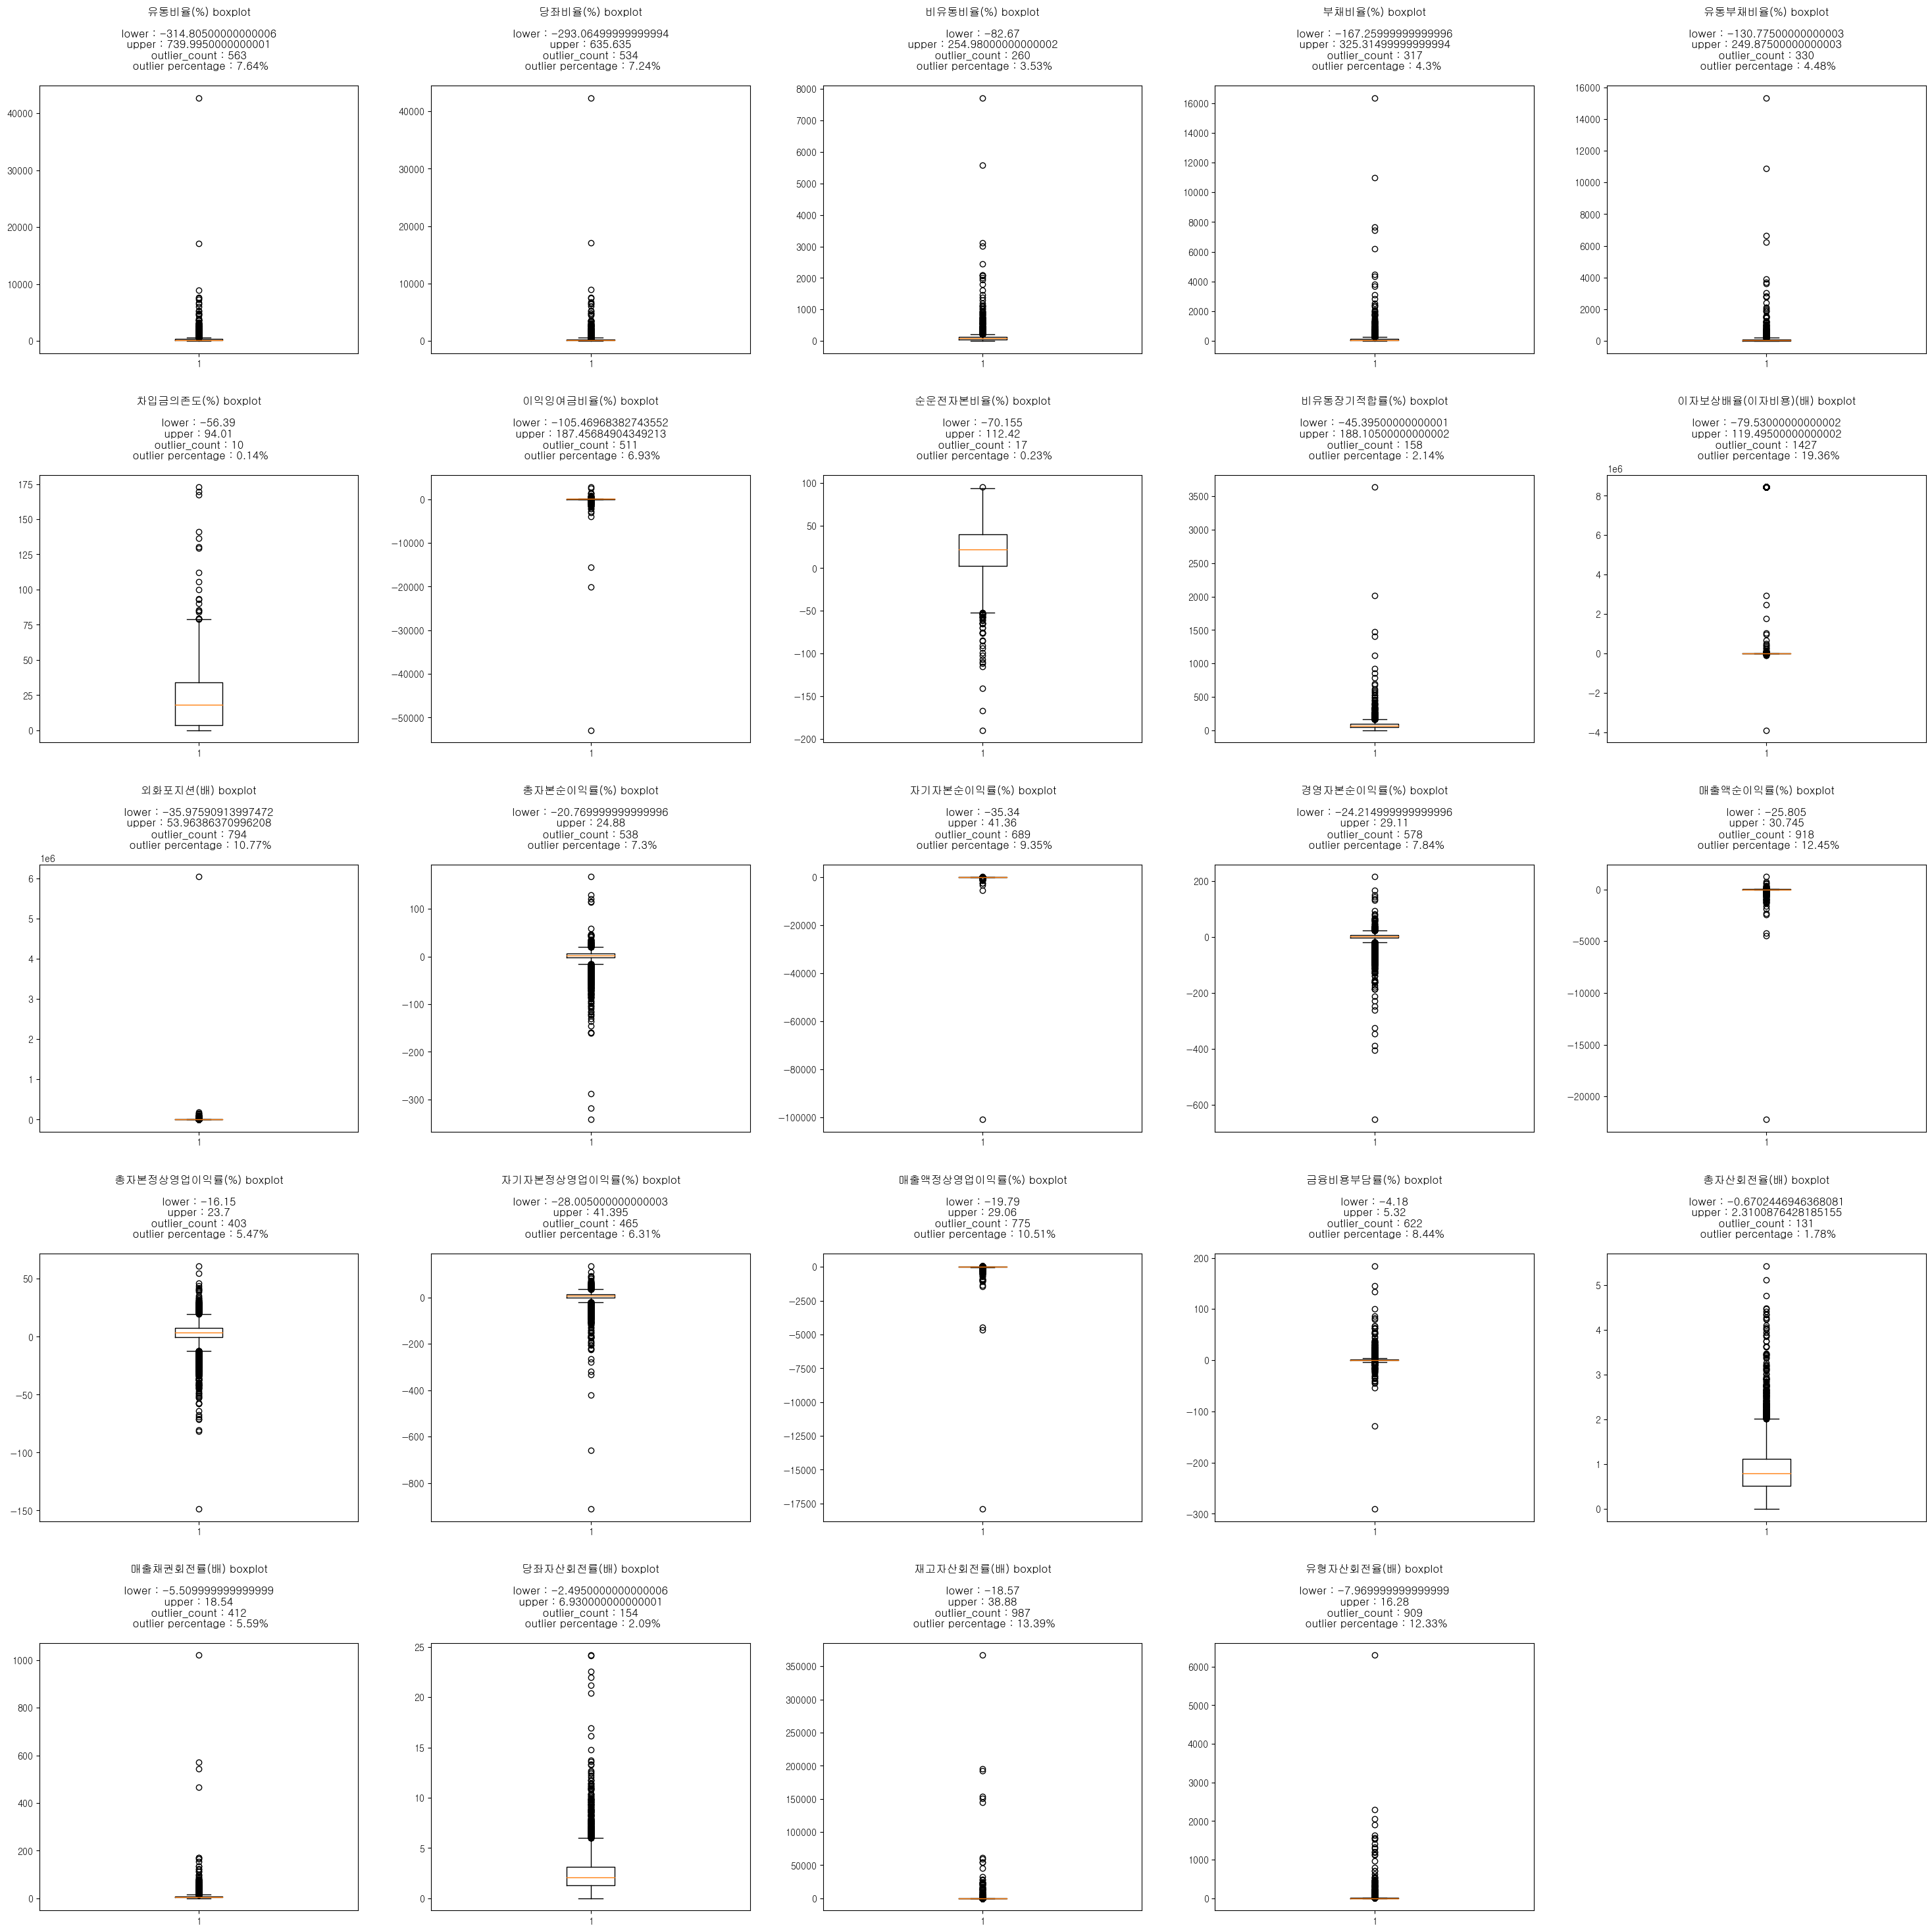

In [182]:
## 이상치를 확인하는 함수 호출, 박스플롯 그리기
box_plot_datas = []

for col in box_q_df.columns[:25]:
    data = outliers_iqr(box_q_df, col)
    box_plot_datas.append(data)

plt.figure(figsize=(30,30))

for i in range(1,len(box_q_df.columns)//2+1):
    plt.subplot(5,5,i)
    plt.title(box_plot_datas[i-1][0])
    plt.boxplot(box_plot_datas[i-1][1])

plt.tight_layout(pad=3)
plt.show()

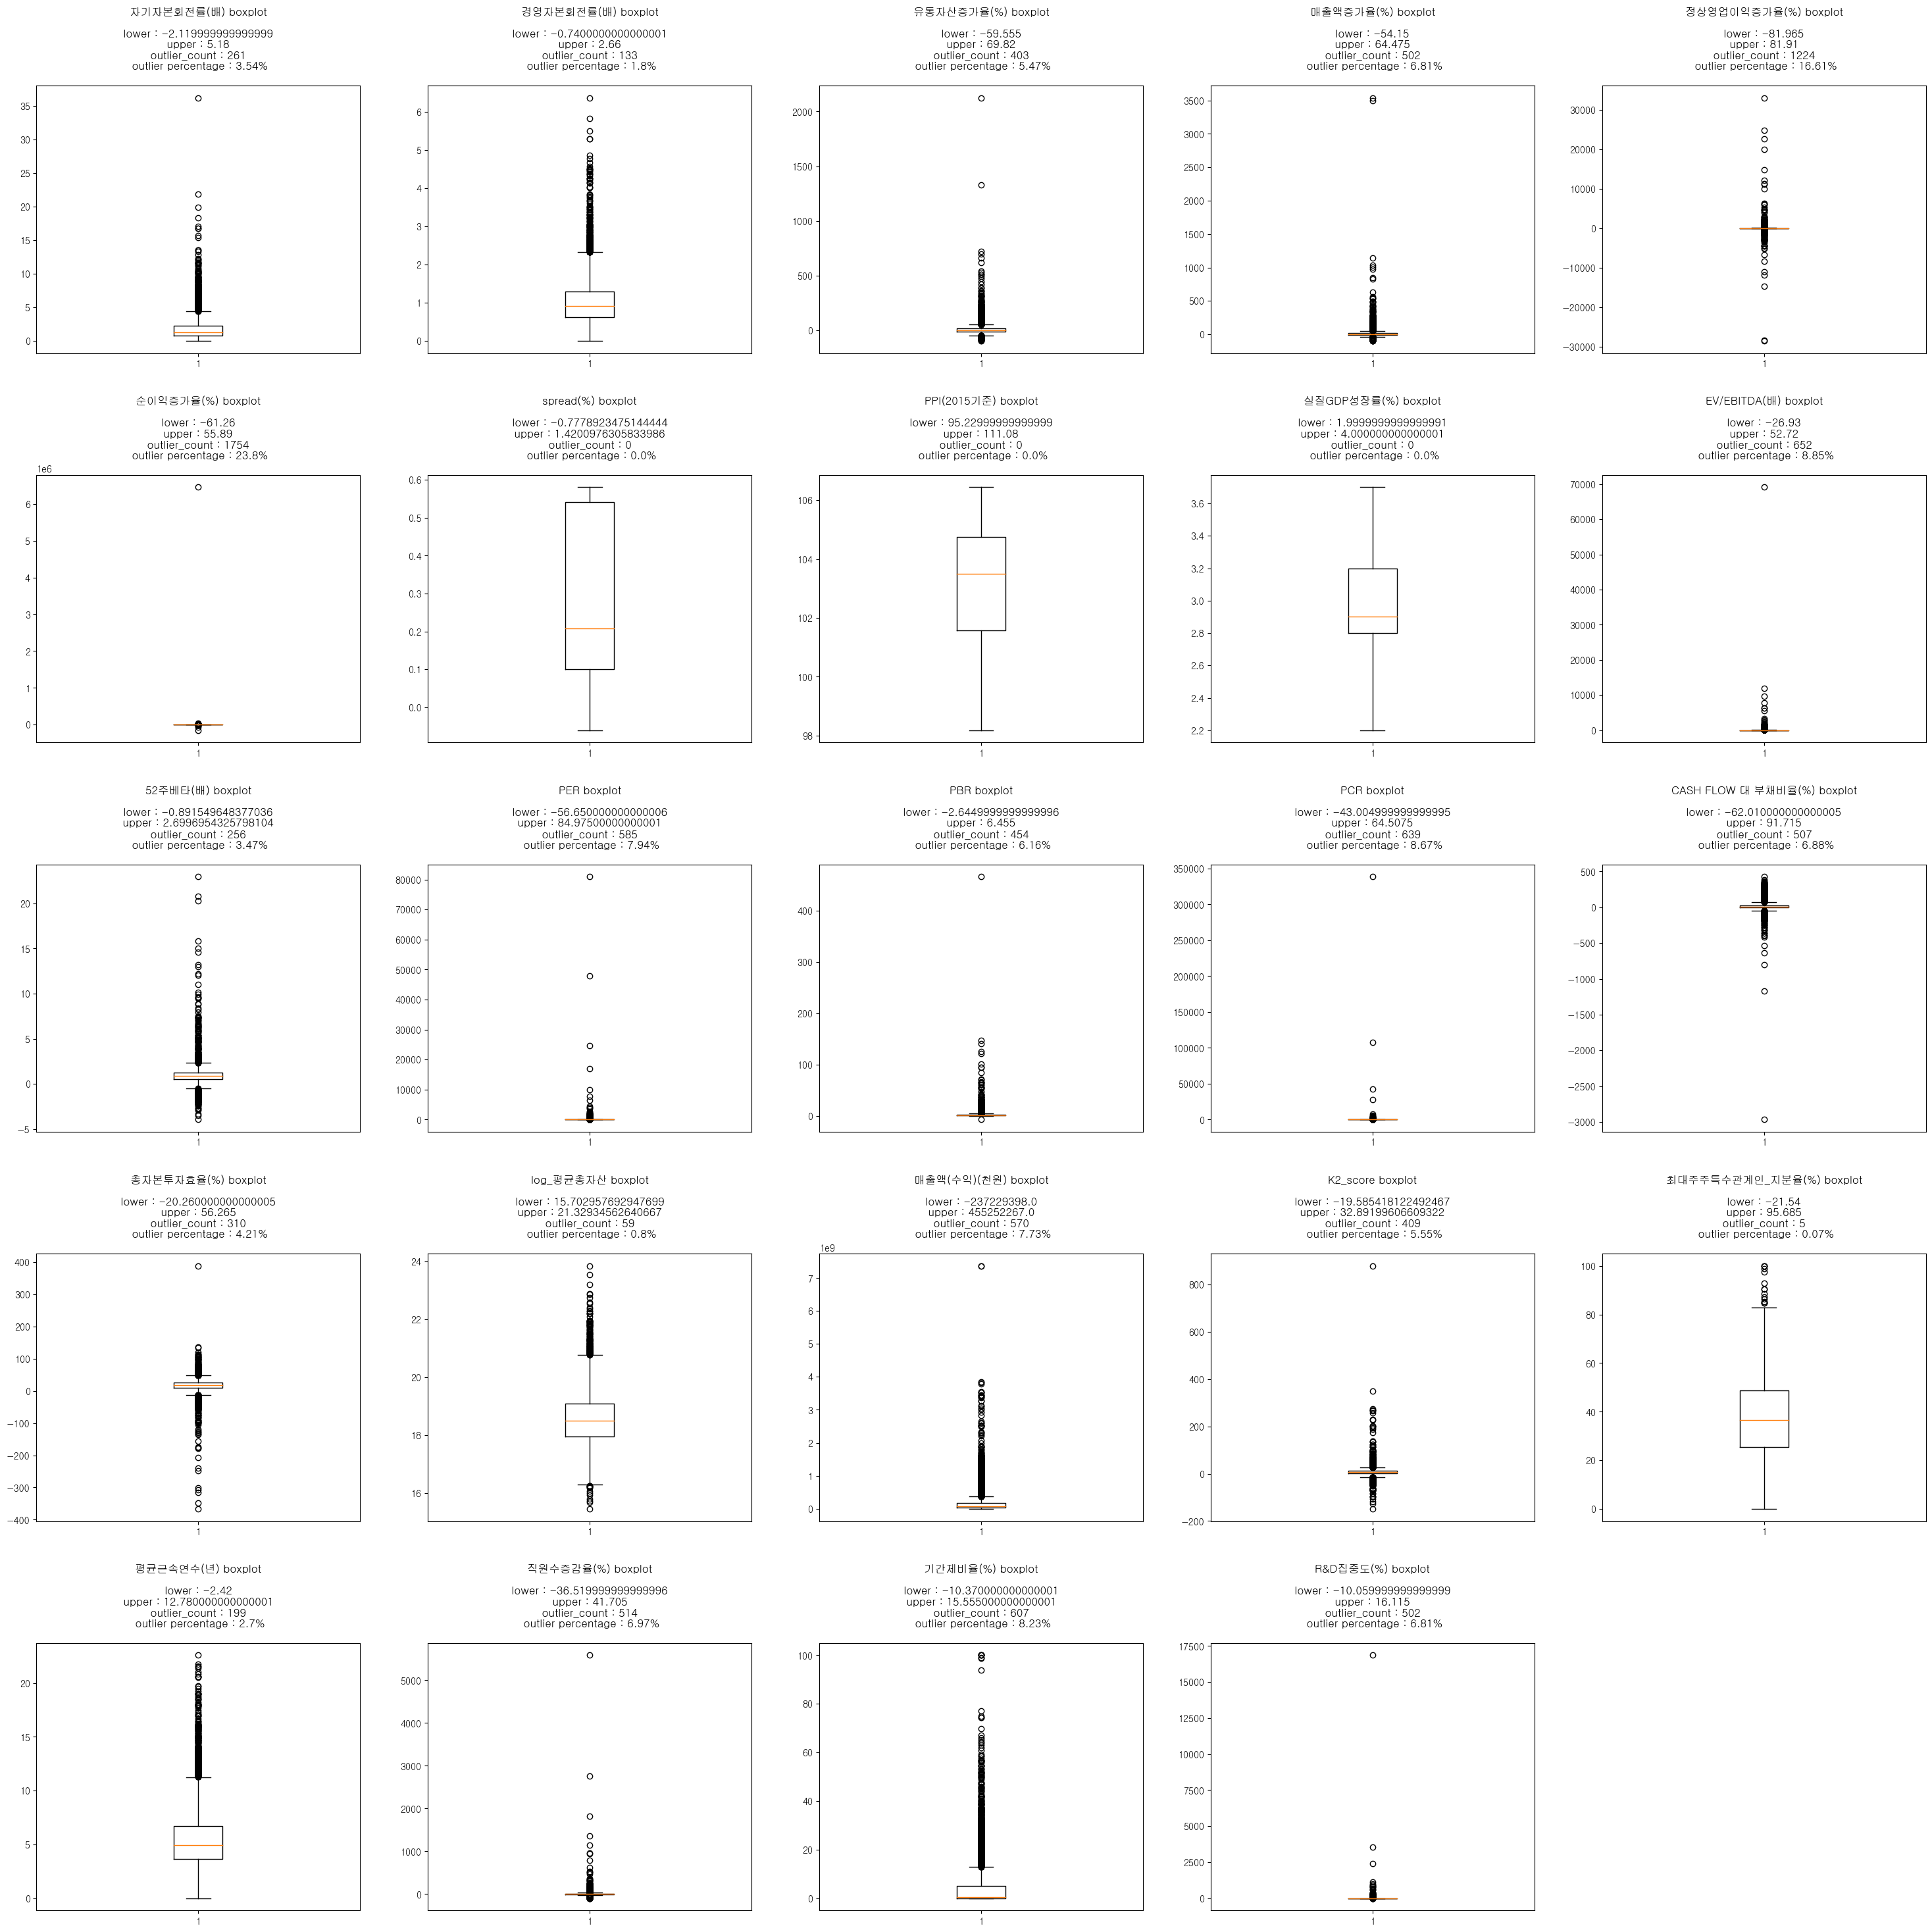

In [183]:
## 이상치를 확인하는 함수 호출, 박스플롯 그리기
box_plot_datas = []

for col in box_q_df.columns[25:]:
    data = outliers_iqr(box_q_df, col)
    box_plot_datas.append(data)

plt.figure(figsize=(30,30))

for i in range(1,len(box_q_df.columns)//2+1):
    plt.subplot(5,5,i)
    plt.title(box_plot_datas[i-1][0])
    plt.boxplot(box_plot_datas[i-1][1])

plt.tight_layout(pad=3)
plt.show()

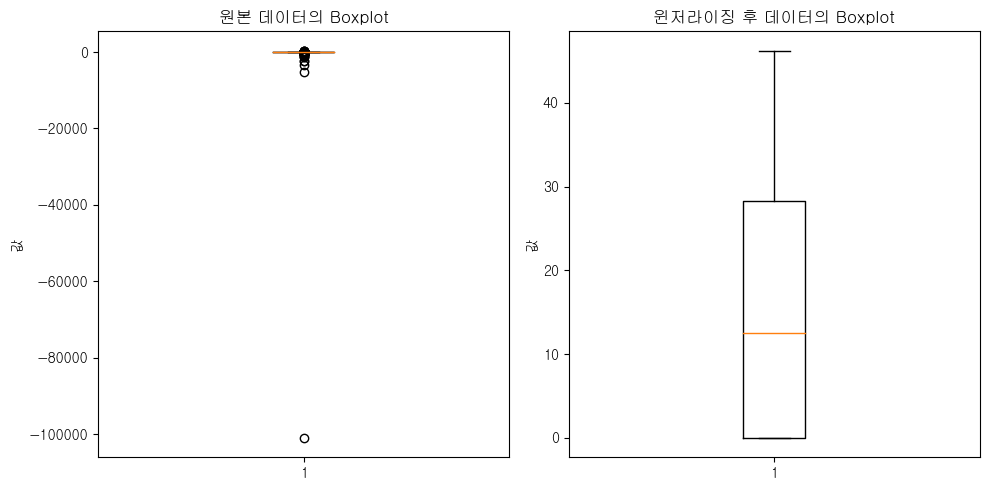

In [203]:
# i ) winsorizing 1% 


# 상위 1%와 하위 1%의 값을 구합니다.
upper_cutoff = np.percentile(box_q_df['자기자본순이익률(%)'], 99.5)
lower_cutoff = np.percentile(box_q_df['자기자본순이익률(%)'], 0.5)

# 윈저라이징 적용
data_winsorized = np.clip(box_q_df['PER'], lower_cutoff, upper_cutoff)

# boxplot 비교를 위한 subplot 생성
plt.figure(figsize=(10, 5))

# 원본 데이터의 boxplot
plt.subplot(1, 2, 1)
plt.boxplot(box_q_df['자기자본순이익률(%)'])
plt.title('원본 데이터의 Boxplot')
plt.ylabel('값')

# 윈저라이징 후 데이터의 boxplot
plt.subplot(1, 2, 2)
plt.boxplot(data_winsorized)
plt.title('윈저라이징 후 데이터의 Boxplot')
plt.ylabel('값')

plt.tight_layout()
plt.show()

C:\Users\zino0\AppData\Local\Temp\ipykernel_28604\1039594189.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


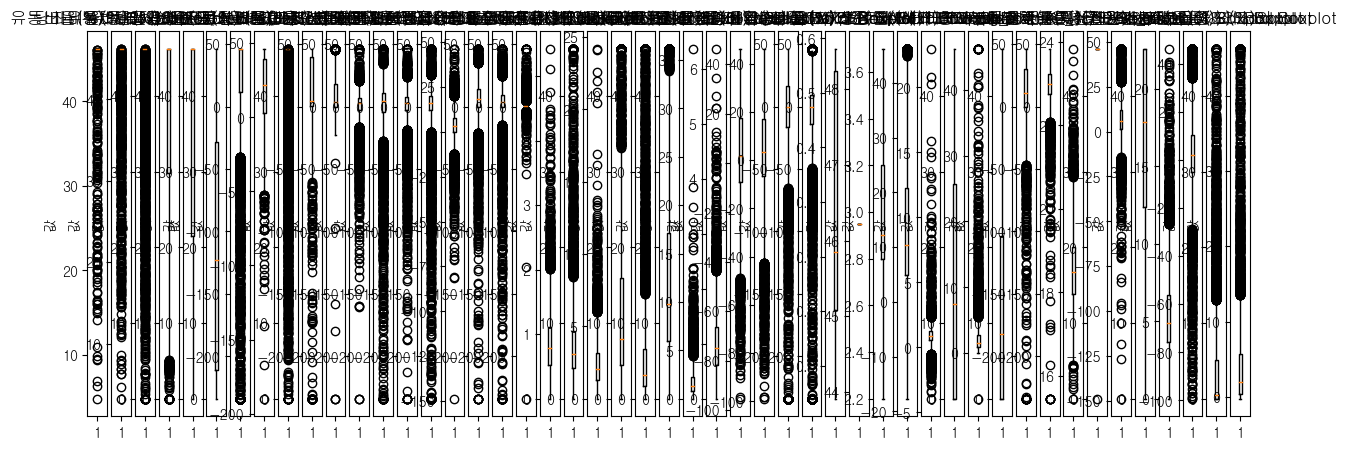

In [204]:
# 상위 1%와 하위 1%의 값을 구합니다.
upper_cutoff = np.percentile(box_q_df['자기자본순이익률(%)'], 99.5)
lower_cutoff = np.percentile(box_q_df['자기자본순이익률(%)'], 0.5)

# 반복문으로 Boxplot 비교 생성
plt.figure(figsize=(15, 5))
for i, col in enumerate(box_q_df.columns):
    plt.subplot(1, len(box_q_df.columns), i + 1)
    plt.boxplot(np.clip(box_q_df[col], lower_cutoff, upper_cutoff))
    plt.title(f"{col}의 Boxplot")
    plt.ylabel('값')

plt.tight_layout()
plt.show()


---

### 컬럼별 인코딩 & 비닝 방식 

In [207]:
main_df['최대주주변경횟수(회)'].describe(percentiles=[0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99])

count    10900.000000
mean         2.801468
std          2.227257
min          0.000000
1%           0.000000
5%           0.000000
10%          0.000000
20%          1.000000
30%          1.000000
50%          2.000000
60%          3.000000
70%          4.000000
80%          5.000000
90%          6.000000
95%          7.000000
99%          9.000000
max         11.000000
Name: 최대주주변경횟수(회), dtype: float64

In [208]:
main_df['감사법인변경횟수(회)'].describe(percentiles=[0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99])

count    10900.000000
mean         1.208532
std          1.345493
min          0.000000
1%           0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
50%          1.000000
60%          1.000000
70%          2.000000
80%          2.000000
90%          3.000000
95%          4.000000
99%          5.000000
max          8.000000
Name: 감사법인변경횟수(회), dtype: float64

---

### 별도. 순운전자본비율 > 유동부채비율 :
    - Formula 상 위 대소관계는 비정상 
    - 자기자본 ==0 일때, inf가 아닌 0으로 처리되는 Case 가능성 有
    → 별도 처리 X  
    

In [135]:
main_df.loc[(main_df['순운전자본비율(%)'] < 0) & (main_df['유동부채비율(%)'] == 0)]

,회사명,거래소코드,회계년도,유동비율(%),당좌비율(%),비유동비율(%),부채비율(%),유동부채비율(%),차입금의존도(%),이익잉여금비율(%),...,최대주주변경횟수(회),감사법인변경횟수(회),업력(년),평균근속연수(년),직원수증감율(%),기간제비율(%),R&D집중도(%),수출기업여부(dummy),주거래은행,Target
96,(주)골드앤에스,35290,2019,18.57,16.21,0.0,0.0,0.0,112.14,-955.721895,...,7,5,19,2.310000,-19.67,0.00,3.94,0,IBK기업은행,1
2025,(주)리드,197210,2019,44.29,42.88,0.0,0.0,0.0,129.36,-2229.702481,...,2,6,4,6.200000,-43.48,0.00,0.78,0,우리은행,1
2364,(주)모린스,110310,2013,6.25,6.25,0.0,0.0,0.0,76.63,-432.409974,...,0,0,4,2.000000,-82.22,0.00,7.55,1,국민은행,1
2481,(주)미성포리테크,94700,2011,34.08,11.85,0.0,0.0,0.0,75.62,745.485525,...,0,0,3,3.300000,-32.12,0.00,2.74,0,IBK기업은행,1
2725,(주)베스파,299910,2021,76.42,76.42,0.0,0.0,0.0,50.02,-251.352023,...,2,1,2,2.600000,-44.32,2.55,26.39,0,우리은행,1
3164,(주)삼우이엠씨,26250,2012,32.83,32.40,0.0,0.0,0.0,105.53,-52909.880264,...,1,1,17,5.570000,-32.79,0.00,0.49,0,신한은행,1
3888,(주)소리바다,53110,2021,64.08,63.45,0.0,0.0,0.0,56.18,7832.324510,...,6,4,20,2.900000,-55.22,0.00,0.00,0,우리은행,1
4173,(주)시너지이노베이션,48870,2015,22.73,20.83,0.0,0.0,0.0,172.73,-1250.604358,...,1,0,11,4.500000,-76.14,0.00,23.45,0,우리은행,1
4954,(주)아이엠텍,226350,2020,47.37,44.32,0.0,0.0,0.0,89.18,-1801.031265,...,2,6,4,3.130000,-23.28,0.00,5.65,0,IBK기업은행,1
6318,(주)엔스퍼트,98400,2011,40.98,17.95,0.0,0.0,0.0,69.31,585.509160,...,0,0,3,1.600000,-48.30,0.00,12.01,0,우리은행,1


In [136]:
df_train.loc[df_train['이자보상배율(이자비용)(배)'] ==df_train['이자보상배율(이자비용)(배)'].max()][['회사명', '거래소코드', '회계년도', '이자보상배율(이자비용)(배)', 'Target']]
# df_train[['이자보상배율(이자비용)(배)']].describe(percentiles = [.05, .25, .5, .75, .95])

,회사명,거래소코드,회계년도,이자보상배율(이자비용)(배),Target
5,(주)CMG제약,58820,2016,999999999.0,0
6,(주)CMG제약,58820,2017,999999999.0,0
7,(주)CMG제약,58820,2018,999999999.0,0
275,(주)금화피에스시,36190,2011,999999999.0,0
276,(주)금화피에스시,36190,2012,999999999.0,0
...,...,...,...,...,...
17321,해성산업(주),34810,2017,999999999.0,0
17370,현대에이치티(주),39010,2018,999999999.0,0
17371,현대에이치티(주),39010,2019,999999999.0,0
17435,휴림네트웍스(주),192410,2016,999999999.0,1


In [137]:
# 이자보상배율()

## III-. K2_score

## III-. R&D집중도

## III-. 평균근속연수